In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

# Question 1 - Extracting Tesla Stock Data Using yfinance

In [3]:
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    stock_data = stock.history(period="max")
    stock_data.reset_index(inplace=True)
    return stock_data

tesla_data = get_stock_data("TSLA")
print(tesla_data.head())  # Display first 5 rows

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


# Question 2 - Extracting Tesla Revenue Data Using Web Scraping

In [4]:
def get_revenue_data(url, table_class):
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    soup = BeautifulSoup(response.text, "html.parser")
    tables = soup.find_all("table", class_=table_class)
    df_list = pd.read_html(str(tables[0])) if tables else []
    return df_list[0] if df_list else None

tesla_revenue = get_revenue_data("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue", "historical_data_table")
print(tesla_revenue.tail())  # Display last 5 rows

    Tesla Annual Revenue (Millions of US $)  \
11                                     2013   
12                                     2012   
13                                     2011   
14                                     2010   
15                                     2009   

   Tesla Annual Revenue (Millions of US $).1  
11                                    $2,013  
12                                      $413  
13                                      $204  
14                                      $117  
15                                      $112  


C:\Users\tkash\AppData\Local\Temp\ipykernel_21004\3553346322.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_list = pd.read_html(str(tables[0])) if tables else []


# Question 3 - Extracting GameStop Stock Data Using yfinance

In [5]:
gme_data = get_stock_data("GME")
print(gme_data.head())  # Display first 5 rows

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# Question 4 - Extracting GameStop Revenue Data Using Web Scraping

In [6]:
gme_revenue = get_revenue_data("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue", "historical_data_table")
print(gme_revenue.tail())  # Display last 5 rows

    GameStop Annual Revenue (Millions of US $)  \
11                                        2013   
12                                        2012   
13                                        2011   
14                                        2010   
15                                        2009   

   GameStop Annual Revenue (Millions of US $).1  
11                                       $8,887  
12                                       $9,551  
13                                       $9,474  
14                                       $9,078  
15                                       $8,806  


C:\Users\tkash\AppData\Local\Temp\ipykernel_21004\3553346322.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_list = pd.read_html(str(tables[0])) if tables else []


# Question 5 - Plot Tesla Stock Graph

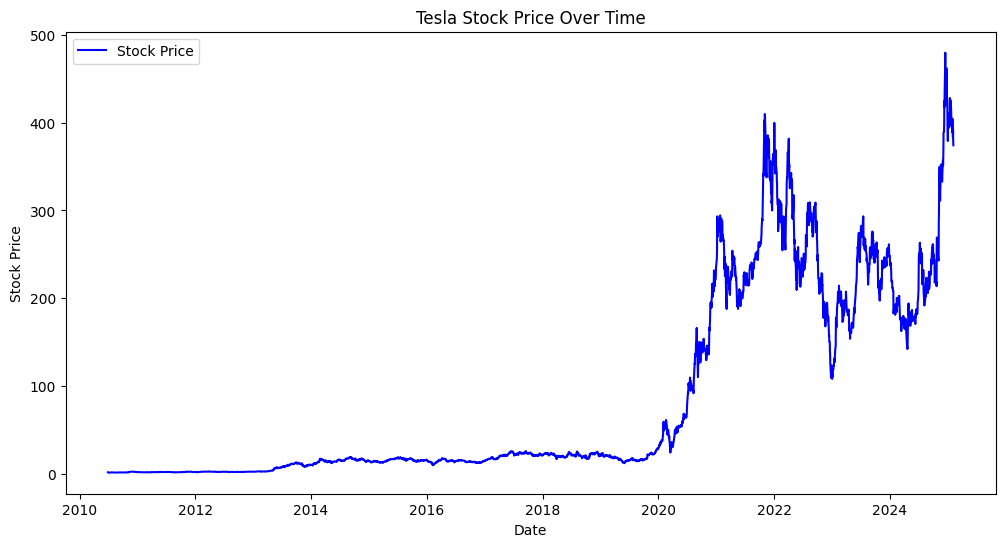

In [7]:
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(title)
    plt.legend()
    plt.show()

make_graph(tesla_data, "Tesla Stock Price Over Time")

# Question 6 - Plot GameStop Stock Graph

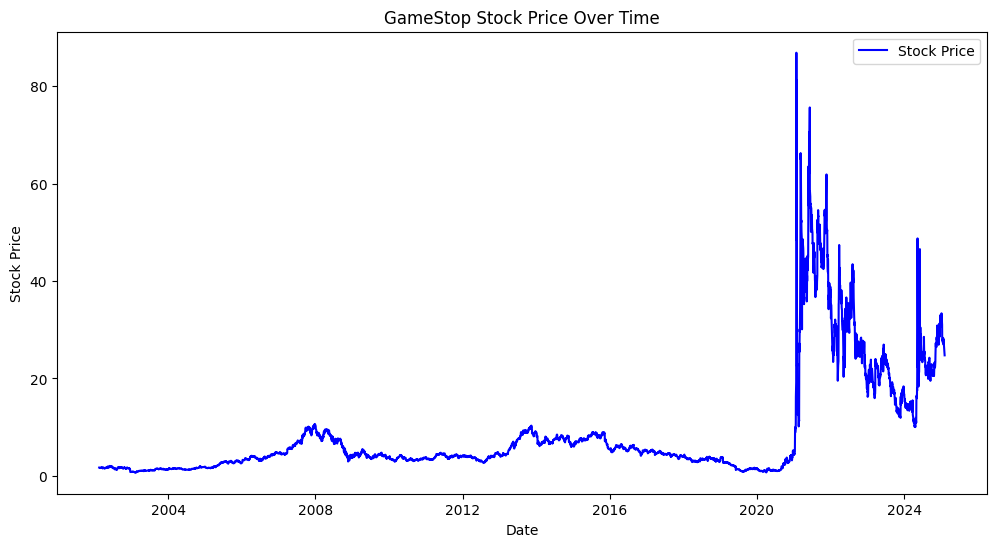

In [8]:
make_graph(gme_data, "GameStop Stock Price Over Time")